In [ ]:
from xgboost.sklearn import XGBRegressor
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from sklearn.model_selection import cross_val_score


hybrid_data_alphabet = "/content/drive/MyDrive/Master thesis data/Window_Alphabet.csv"
financial_data_alphabet = "/content/drive/MyDrive/Master thesis data/alphabet_financial_window.csv"

hybrid_data_apple = "/content/drive/MyDrive/Master thesis data/Window_Apple.csv"
financial_data_apple = "/content/drive/MyDrive/Master thesis data/apple_financial_window.csv"

hybrid_data_microsoft = "/content/drive/MyDrive/Master thesis data/Window_Microsoft.csv"
financial_data_microsoft = "/content/drive/MyDrive/Master thesis data/microsoft_financial_window.csv"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hybrid_data_alphabet = pd.read_csv(hybrid_data_alphabet)
financial_data_alphabet = pd.read_csv(financial_data_alphabet)

hybrid_data_apple = pd.read_csv(hybrid_data_apple)
financial_data_apple = pd.read_csv(financial_data_apple)

hybrid_data_microsoft = pd.read_csv(hybrid_data_microsoft)
financial_data_microsoft = pd.read_csv(financial_data_microsoft)

In [ ]:
hybrid_data_alphabet_X = hybrid_data_alphabet.drop(['date','close','Unnamed: 0' ], axis=1)
hybrid_data_alphabet_y = hybrid_data_alphabet['close']
financial_data_alphabet_X = financial_data_alphabet.drop(['date','close','Unnamed: 0'], axis=1)
financial_data_alphabet_y = financial_data_alphabet['close']

hybrid_data_apple_X = hybrid_data_apple.drop(['date','close','Unnamed: 0'], axis=1)
hybrid_data_apple_y = hybrid_data_apple['close']
financial_data_apple_X = financial_data_apple.drop(['date','close','Unnamed: 0'], axis=1)
financial_data_apple_y = financial_data_apple['close']

hybrid_data_microsoft_X = hybrid_data_microsoft.drop(['date','close','Unnamed: 0'], axis=1)
hybrid_data_microsoft_y = hybrid_data_microsoft['close']
financial_data_microsoft_X = financial_data_microsoft.drop(['date','close','Unnamed: 0'], axis=1)
financial_data_microsoft_y = financial_data_microsoft['close']

In [ ]:
financial_data_alphabet_X = financial_data_alphabet_X.tail(-4)
financial_data_alphabet_y = financial_data_alphabet_y.tail(-4)
financial_data_apple_X = financial_data_apple_X.tail(-4)
financial_data_apple_y = financial_data_apple_y.tail(-4)
financial_data_microsoft_X = financial_data_microsoft_X.tail(-4)
financial_data_microsoft_y = financial_data_microsoft_y.tail(-4)

In [ ]:
financial_data_alphabet_X = financial_data_alphabet_X.fillna(financial_data_alphabet_X.mean())
financial_data_apple_X = financial_data_apple_X.fillna(financial_data_apple_X.mean())
financial_data_microsoft_X = financial_data_microsoft_X.fillna(financial_data_microsoft_X.mean())

In [ ]:
hybrid_data_alphabet = hybrid_data_alphabet.drop(['close','Unnamed: 0' ], axis=1)
financial_data_alphabet = financial_data_alphabet.drop(['close','Unnamed: 0' ], axis=1)

hybrid_data_apple = hybrid_data_apple.drop(['close','Unnamed: 0'], axis=1)
financial_data_apple = financial_data_apple.drop([ 'close','Unnamed: 0' ], axis=1)

hybrid_data_microsoft = hybrid_data_microsoft.drop(['close','Unnamed: 0'], axis=1)
financial_data_microsoft = financial_data_microsoft.drop([ 'close','Unnamed: 0' ], axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_X_hybrid_alphabet = MinMaxScaler()
hybrid_data_alphabet_X = scaler_X_hybrid_alphabet.fit_transform(hybrid_data_alphabet_X)
scaler_X_financial_alphabet = MinMaxScaler()
financial_data_alphabet_X = scaler_X_financial_alphabet.fit_transform(financial_data_alphabet_X)

scaler_X_hybrid_microsoft = MinMaxScaler()
hybrid_data_microsoft_X = scaler_X_hybrid_microsoft.fit_transform(hybrid_data_microsoft_X)
scaler_X_financial_microsoft = MinMaxScaler()
financial_data_microsoft_X = scaler_X_financial_microsoft.fit_transform(financial_data_microsoft_X)

scaler_X_hybrid_apple = MinMaxScaler()
hybrid_data_apple_X = scaler_X_hybrid_apple.fit_transform(hybrid_data_apple_X)
scaler_X_financial_apple = MinMaxScaler()
financial_data_apple_X = scaler_X_financial_apple.fit_transform(financial_data_apple_X)

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

financial_cv_alphabet = tscv.split(financial_data_alphabet_X)
hybrid_cv_alphabet = tscv.split(hybrid_data_alphabet_X)

financial_cv_apple = tscv.split(financial_data_apple_X)
hybrid_cv_apple = tscv.split(hybrid_data_apple_X)

financial_cv_microsoft = tscv.split(financial_data_microsoft_X)
hybrid_cv_microsoft = tscv.split(hybrid_data_microsoft_X)

In [ ]:
parameters = {
    'learning_rate': [0.4, 0.5],
    'n_estimators': [3000, 4000, 5000, 6000, 7000],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.001, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.001, 0.01, 0.1, 1],
    'scale_pos_weight': [1, 10, 100, 1000]
}

regressor = XGBRegressor(booster='gblinear', objective ='reg:squarederror')
grid_search_financial_alphabet = GridSearchCV(regressor, parameters, cv=financial_cv_alphabet, scoring="neg_mean_squared_error", verbose=3)
grid_search_hybrid_alphabet = GridSearchCV(regressor, parameters, cv=hybrid_cv_alphabet, scoring="neg_mean_squared_error",  verbose=3)

grid_search_financial_apple = GridSearchCV(regressor, parameters, cv=financial_cv_apple, scoring="neg_mean_squared_error",  verbose=3)
grid_search_hybrid_apple = GridSearchCV(regressor, parameters, cv=hybrid_cv_apple, scoring="neg_mean_squared_error", verbose=3)

grid_search_financial_microsoft = GridSearchCV(regressor, parameters, cv=financial_cv_microsoft, scoring="neg_mean_squared_error",  verbose=3)
grid_search_hybrid_microsoft = GridSearchCV(regressor, parameters, cv=hybrid_cv_microsoft, scoring="neg_mean_squared_error", verbose=3)

grid_search_financial_alphabet.fit(financial_data_alphabet_X, financial_data_alphabet_y.ravel())
grid_search_hybrid_alphabet.fit(hybrid_data_alphabet_X, hybrid_data_alphabet_y.ravel())

grid_search_financial_apple.fit(financial_data_apple_X, financial_data_apple_y.ravel())
grid_search_hybrid_apple.fit(hybrid_data_apple_X, hybrid_data_apple_y.ravel())

grid_search_financial_microsoft.fit(financial_data_microsoft_X, financial_data_microsoft_y.ravel())
grid_search_hybrid_microsoft.fit(hybrid_data_microsoft_X, hybrid_data_microsoft_y.ravel())


In [ ]:
grid_search_financial_alphabet.best_params_

In [ ]:
grid_search_hybrid_alphabet.best_params_

In [ ]:
grid_search_financial_apple.best_params_

In [ ]:
grid_search_hybrid_apple.best_params_

In [ ]:
grid_search_financial_microsoft.best_params_

In [ ]:
grid_search_hybrid_microsoft.best_params_

In [ ]:
alphabet_financial_params = grid_search_financial_alphabet.best_params_

alphabet_hybrid_params = grid_search_hybrid_alphabet.best_params_

apple_financial_params = grid_search_financial_apple.best_params_

apple_hybrid_params = grid_search_hybrid_apple.best_params_

microsoft_financial_params = grid_search_financial_microsoft.best_params_

microsoft_hybrid_params = grid_search_hybrid_microsoft.best_params_

In [ ]:
apple_financial_reg = XGBRegressor(**apple_financial_params, booster='gblinear', objective ='reg:squarederror')
apple_hybrid_reg = XGBRegressor(**apple_hybrid_params, booster='gblinear', objective ='reg:squarederror')

microsoft_financial_reg = XGBRegressor(**microsoft_financial_params,booster='gblinear', objective ='reg:squarederror')
microsoft_hybrid_reg = XGBRegressor(**microsoft_hybrid_params, booster='gblinear', objective ='reg:squarederror')

alphabet_financial_reg = XGBRegressor(**alphabet_financial_params, booster='gblinear', objective ='reg:squarederror')
alphabet_hybrid_reg = XGBRegressor(**alphabet_hybrid_params,booster='gblinear', objective ='reg:squarederror' )

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

financial_cv_alphabet = tscv.split(financial_data_alphabet_X)
hybrid_cv_alphabet = tscv.split(hybrid_data_alphabet_X)

financial_cv_apple = tscv.split(financial_data_apple_X)
hybrid_cv_apple = tscv.split(hybrid_data_apple_X)

financial_cv_microsoft = tscv.split(financial_data_microsoft_X)
hybrid_cv_microsoft = tscv.split(hybrid_data_microsoft_X)

In [ ]:
cross_val_alphabet_financial = cross_val_score(alphabet_financial_reg, financial_data_alphabet_X, financial_data_alphabet_y.ravel(), cv=financial_cv_alphabet, scoring='neg_mean_squared_error')
cross_val_alphabet_hybrid = cross_val_score(alphabet_hybrid_reg, hybrid_data_alphabet_X, hybrid_data_alphabet_y.ravel(), cv=hybrid_cv_alphabet, scoring='neg_mean_squared_error')

cross_val_apple_financial = cross_val_score(apple_financial_reg, financial_data_apple_X, financial_data_apple_y.ravel(), cv=financial_cv_apple, scoring='neg_mean_squared_error')
cross_val_apple_hybrid = cross_val_score(apple_hybrid_reg, hybrid_data_apple_X, hybrid_data_apple_y.ravel(), cv=hybrid_cv_apple, scoring='neg_mean_squared_error')

cross_val_microsoft_financial = cross_val_score(microsoft_financial_reg, financial_data_microsoft_X, financial_data_microsoft_y.ravel(), cv=financial_cv_microsoft, scoring='neg_mean_squared_error')
cross_val_microsoft_hybrid = cross_val_score(microsoft_hybrid_reg, hybrid_data_microsoft_X, hybrid_data_microsoft_y.ravel(), cv=hybrid_cv_microsoft, scoring='neg_mean_squared_error')

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

financial_cv_alphabet = tscv.split(financial_data_alphabet_X)
hybrid_cv_alphabet = tscv.split(hybrid_data_alphabet_X)

financial_cv_apple = tscv.split(financial_data_apple_X)
hybrid_cv_apple = tscv.split(hybrid_data_apple_X)

financial_cv_microsoft = tscv.split(financial_data_microsoft_X, financial_data_microsoft_y)
hybrid_cv_microsoft = tscv.split(hybrid_data_microsoft_X)

In [ ]:
cross_val_alphabet_financial_mape = cross_val_score(alphabet_financial_reg, financial_data_alphabet_X, financial_data_alphabet_y.ravel(), cv=financial_cv_alphabet, scoring='neg_mean_absolute_percentage_error')
cross_val_alphabet_hybrid_mape = cross_val_score(alphabet_hybrid_reg, hybrid_data_alphabet_X, hybrid_data_alphabet_y.ravel(), cv=hybrid_cv_alphabet, scoring='neg_mean_absolute_percentage_error')

cross_val_apple_financial_mape = cross_val_score(apple_financial_reg, financial_data_apple_X, financial_data_apple_y.ravel(), cv=financial_cv_apple, scoring='neg_mean_absolute_percentage_error')
cross_val_apple_hybrid_mape = cross_val_score(apple_hybrid_reg, hybrid_data_apple_X, hybrid_data_apple_y.ravel(), cv=hybrid_cv_apple, scoring='neg_mean_absolute_percentage_error')

cross_val_microsoft_financial_mape = cross_val_score(microsoft_financial_reg, financial_data_microsoft_X, financial_data_microsoft_y.ravel(), cv=financial_cv_microsoft, scoring='neg_mean_absolute_percentage_error')
cross_val_microsoft_hybrid_mape = cross_val_score(microsoft_hybrid_reg, hybrid_data_microsoft_X, hybrid_data_microsoft_y.ravel(), cv=hybrid_cv_microsoft, scoring='neg_mean_absolute_percentage_error')

In [ ]:
cross_val_alphabet_financial = cross_val_alphabet_financial.mean() * -1
cross_val_alphabet_hybrid = cross_val_alphabet_hybrid.mean() * -1
cross_val_apple_financial = cross_val_apple_financial.mean() * -1
cross_val_apple_hybrid = cross_val_apple_hybrid.mean() * -1
cross_val_microsoft_financial = cross_val_microsoft_financial.mean() * -1
cross_val_microsoft_hybrid = cross_val_microsoft_hybrid.mean() * -1

In [ ]:
cross_val_alphabet_financial_mape = cross_val_alphabet_financial_mape.mean() * -1
cross_val_alphabet_hybrid_mape = cross_val_alphabet_hybrid_mape.mean() * -1
cross_val_apple_financial_mape = cross_val_apple_financial_mape.mean() * -1
cross_val_apple_hybrid_mape = cross_val_apple_hybrid_mape.mean() * -1
cross_val_microsoft_financial_mape = cross_val_microsoft_financial_mape.mean() * -1
cross_val_microsoft_hybrid_mape = cross_val_microsoft_hybrid_mape.mean() * -1

In [ ]:
def assign_direction_prediction(val):
  open = val['open']
  close = val['prediction']
  if (open < close):
    val['direction_prediction'] = 1
  if (close == open):
    val['direction_prediction'] = 0
  if (open > close):
    val['direction_prediction'] = 2
  return val

def assign_actual_direction(val):
  open = val['open']
  close = val['actual']
  if (open < close):
    val['direction_actual'] = 1
  if (close == open):
    val['direction_actual'] = 0
  if (open > close):
    val['direction_actual'] = 2
  return val



def plot_price_prediction(x, y, model, title, ax, scaler, open_column):
    train_X_1 = x[0:200]
    train_X_2 = x[0:400]
    train_X_3 = x[0:600]
    train_X_4 = x[0:800]
    test_X_1 = x[200:400]
    test_X_2 = x[400:600]
    test_X_3 = x[600:800]
    test_X_4 = x[800:]

    train_y_1 = y[0:200]
    train_y_2 = y[0:400]
    train_y_3 = y[0:600]
    train_y_4 = y[0:800]
    test_y_1 = y[200:400]
    test_y_2 = y[400:600]
    test_y_3 = y[600:800]
    test_y_4 = y[800:]

    data_to_be_rescaled = x[200:]

    model.fit(train_X_1, train_y_1)
    predict_1 = model.predict(test_X_1)
    model.fit(train_X_2, train_y_2)
    predict_2 = model.predict(test_X_2)
    model.fit(train_X_3, train_y_3)
    predict_3 = model.predict(test_X_3)
    model.fit(train_X_4, train_y_4)
    predict_4 = model.predict(test_X_4)

    final_predictions = [predict_1, predict_2, predict_3, predict_4]
    final_actuals = [test_y_1, test_y_2, test_y_3, test_y_4]

    predictions = np.concatenate(final_predictions).ravel()
    true = np.concatenate(final_actuals).ravel()

    date = pd.DataFrame(hybrid_data_microsoft['date'][200:]).reset_index(drop=True)
    
    de_scaled_data = pd.DataFrame(scaler.inverse_transform(data_to_be_rescaled))
    dataFrame = {'actual': true,
            'prediction': predictions,
            'open': de_scaled_data[open_column].shift(-1)}
    dataFrame = pd.DataFrame(dataFrame)
    dataFrame = pd.concat([dataFrame, date], axis=1)
    dataFrame = dataFrame.dropna()
    dataFrame = dataFrame.set_index('date')

    
    dataFrame.plot(xlabel="Date", ylabel="Price", title=title, ax=ax)
    
    dataFrame = dataFrame.apply(assign_direction_prediction, axis=1)
    dataFrame = dataFrame.apply(assign_actual_direction, axis=1)
    accuracy = accuracy_score(dataFrame['direction_actual'], dataFrame['direction_prediction'])
    return accuracy


In [ ]:
apple_financial_reg = XGBRegressor(**apple_financial_params,booster='gblinear', objective ='reg:squarederror' )
apple_hybrid_reg = XGBRegressor(**apple_hybrid_params, booster='gblinear', objective ='reg:squarederror')

microsoft_financial_reg = XGBRegressor(**microsoft_financial_params, booster='gblinear', objective ='reg:squarederror')
microsoft_hybrid_reg = XGBRegressor(**microsoft_hybrid_params, booster='gblinear', objective ='reg:squarederror')

alphabet_financial_reg = XGBRegressor(**alphabet_financial_params, booster='gblinear', objective ='reg:squarederror')
alphabet_hybrid_reg = XGBRegressor(**alphabet_hybrid_params, booster='gblinear', objective ='reg:squarederror')

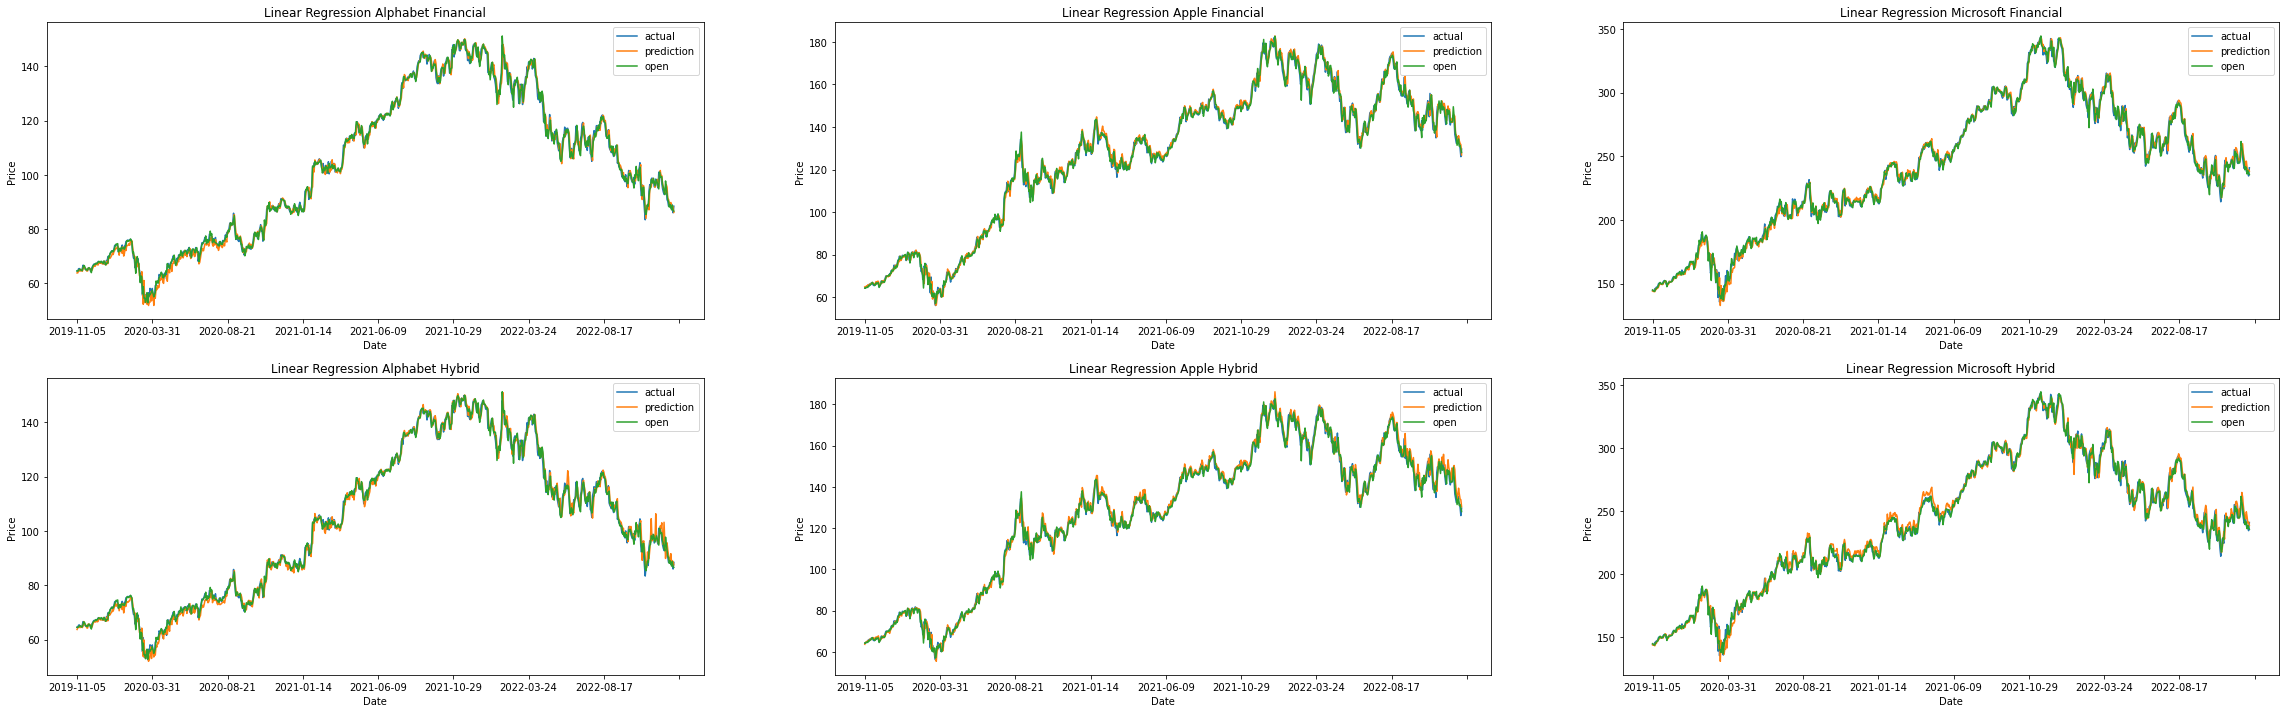

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(40, 12))
accuracy_microsoft_financial = plot_price_prediction(financial_data_microsoft_X, financial_data_microsoft_y, microsoft_financial_reg, "Linear Regression Microsoft Financial", axs[0, 2],scaler_X_financial_microsoft, 4)
accuracy_microsoft_hybrid = plot_price_prediction(hybrid_data_microsoft_X, hybrid_data_microsoft_y, microsoft_hybrid_reg, "Linear Regression Microsoft Hybrid", axs[1, 2],scaler_X_hybrid_microsoft, 19)

accuracy_apple_financial = plot_price_prediction(financial_data_apple_X, financial_data_apple_y, apple_financial_reg, "Linear Regression Apple Financial", axs[0, 1],scaler_X_financial_apple, 4)
accuracy_apple_hybrid = plot_price_prediction(hybrid_data_apple_X, hybrid_data_apple_y, apple_hybrid_reg, "Linear Regression Apple Hybrid", axs[1, 1],scaler_X_hybrid_apple, 19)

accuracy_alphabet_financial = plot_price_prediction(financial_data_alphabet_X, financial_data_alphabet_y, alphabet_financial_reg, "Linear Regression Alphabet Financial", axs[0, 0], scaler_X_financial_alphabet, 4)
accuracy_alphabet_hybrid = plot_price_prediction(hybrid_data_alphabet_X, hybrid_data_alphabet_y, alphabet_hybrid_reg, "Linear Regression Alphabet Hybrid", axs[1, 0],scaler_X_hybrid_alphabet, 19)

In [ ]:
results = pd.DataFrame(columns=['data','MSE','RMSE', "Direction Accuracy"])

results = results.append({'data':'Alphabet Financial',
                              'MSE':cross_val_alphabet_financial.ravel()[0],
                              'RMSE':math.sqrt(cross_val_alphabet_financial),
                              'MAPE':cross_val_alphabet_financial_mape,
                              "Direction Accuracy": accuracy_alphabet_financial},ignore_index=True)
results = results.append({'data':'Alphabet Hybrid',
                              'MSE':cross_val_alphabet_hybrid.ravel()[0],
                              'RMSE':math.sqrt(cross_val_alphabet_hybrid),
                              'MAPE': cross_val_alphabet_hybrid_mape,
                              "Direction Accuracy": accuracy_alphabet_hybrid},ignore_index=True)
results = results.append({'data':'Apple Financial',
                              'MSE':cross_val_apple_financial.ravel()[0],
                              'RMSE':math.sqrt(cross_val_apple_financial),
                              'MAPE':cross_val_apple_financial_mape,
                          "Direction Accuracy": accuracy_apple_financial},ignore_index=True)
results = results.append({'data':'Apple Hybrid',
                              'MSE':cross_val_apple_hybrid.ravel()[0],
                              'RMSE':math.sqrt(cross_val_apple_hybrid),
                              'MAPE': cross_val_apple_hybrid_mape,
                              "Direction Accuracy": accuracy_apple_hybrid},ignore_index=True)
results = results.append({'data':'Microsoft Financial',
                              'MSE':cross_val_microsoft_financial.ravel()[0],
                              'RMSE':math.sqrt(cross_val_microsoft_financial),
                              'MAPE':cross_val_microsoft_financial_mape,
                          "Direction Accuracy": accuracy_microsoft_financial},ignore_index=True)
results = results.append({'data':'Microsoft Hybrid',
                              'MSE':cross_val_microsoft_hybrid.ravel()[0],
                              'RMSE':math.sqrt(cross_val_microsoft_hybrid),
                              'MAPE':cross_val_microsoft_hybrid_mape,
                          "Direction Accuracy": accuracy_microsoft_hybrid},ignore_index=True)

<ipython-input-29-2e07adf740d3>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'data':'Alphabet Financial',
<ipython-input-29-2e07adf740d3>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'data':'Alphabet Hybrid',
<ipython-input-29-2e07adf740d3>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'data':'Apple Financial',
<ipython-input-29-2e07adf740d3>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'data':'Apple Hybrid',
<ipython-input-29-2e07adf740d3>:24: FutureWarning: The frame.append method is deprecated and will be removed f

In [ ]:
display(results)

,data,MSE,RMSE,Direction Accuracy,MAPE
0,Alphabet Financial,4.822387,2.195993,0.491184,0.016405
1,Alphabet Hybrid,5.595479,2.365476,0.465995,0.018191
2,Apple Financial,8.477913,2.911686,0.482368,0.017919
3,Apple Hybrid,9.786957,3.128411,0.501259,0.019669
4,Microsoft Financial,24.305933,4.930105,0.501259,0.016013
5,Microsoft Hybrid,27.136470,5.209268,0.505038,0.016679
